In [ ]:
### Stantistic Analysis of Yearly Return and Moving

In [7]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from config import api_token
from pprint import pprint
from datetime import datetime, timedelta
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [8]:
## 1.Calculate the yearly return and create a DF 

In [9]:
## read the price 500 stocks price data
sp500price_df = pd.read_csv('../output_data/stock500.csv')
sp500price_df = sp500price_df .dropna()
del sp500price_df["Unnamed: 0"]

In [10]:
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [11]:
unique = sp500price_df['Symbol'].unique()
len(unique)

501

In [12]:
# Calculate the yearly return for each stock, which is the percentage change in price from the beginning of the year to the end of the year.
sp500price_df['Yearly Return (%)'] = (sp500price_df['Close']-sp500price_df['Open'])/sp500price_df['Open']*100
sp500price_df['Yearly Moving (%)'] = (sp500price_df['Highest']-sp500price_df['Lowest'])/sp500price_df['Lowest']*100
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%)
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196
...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119


In [13]:
# merge the price file and stock information file
renamed_df = sp500price_df.rename(columns={"Symbol":"Ticker"})
merge_df = pd.merge(renamed_df, sp500_df, on="Ticker")
merge_df.head(25)

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
5,AAPL,2018,58.367500,36.647499,42.540001,39.435001,-7.299011,59.267349,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
6,AAPL,2019,73.492500,35.500000,38.722500,73.412498,89.586155,107.021128,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
7,AAPL,2020,138.789993,53.152500,74.059998,132.690002,79.165551,161.116585,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
8,AAPL,2021,182.130005,116.209999,133.520004,177.570007,32.991313,56.724900,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
9,AAPL,2022,182.940002,125.870003,177.830002,129.929993,-26.935842,45.340429,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD


In [14]:
 ## 2. Calculate the weighted yearly return moving and create a DF 


In [15]:
#read the 500 stocks data
merge_df = pd.read_csv('../output_data/merge.csv')
del merge_df["Unnamed: 0"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [16]:
# Calculated the Weighted Yearly Return and Moving
merge_df["Weighted Yearly Return"] = merge_df["Yearly Return (%)"]*merge_df["Weight"]
merge_df["Weighted Yearly Moving"] = merge_df["Yearly Moving (%)"]*merge_df["Weight"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278


In [57]:
# Calculate the Price-to-Earnings (P/E) Ratio of each company\
merge_df["P/E Ratio"] = merge_df["Yearly Return (%)"]/merge_df["Close"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving,P/E Ratio
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490,0.064885
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378,1.415026
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881,-0.209127
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420,0.444621
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348,1.090584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673,-1.939117
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673,1.287492
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582,-0.304301
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278,0.000950


In [69]:
# test to how to get the weighted yearly return
df = merge_df.loc[(merge_df["Year"]==2013)&(merge_df["Sector"]=='Communication Services') ]
df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving,P/E Ratio
40,GOOGL,2013,28.053053,17.405405,18.003504,28.045795,55.779651,61.174376,Alphabet Inc. Class A,02079K30,BYVY8G0,1.825088,Communication Services,65626300.0,USD,101.802772,111.648619,1.988877
50,GOOG,2013,27.920347,17.323069,17.918339,27.913124,55.779642,61.174373,Alphabet Inc. Class C,02079K10,BYY88Y7,1.603189,Communication Services,57209972.0,USD,89.425309,98.074082,1.998330
70,META,2013,58.580002,22.670000,27.440001,54.650002,99.161809,158.403183,Meta Platforms Inc. Class A,30303M10,B7TL820,1.369542,Communication Services,24524556.0,USD,135.806263,216.939812,1.814489
320,DIS,2013,76.540001,50.180000,50.799999,76.400002,50.393706,52.530890,Walt Disney Company,25468710,2270726,0.526561,Communication Services,20128794.0,USD,26.535360,27.660718,0.659603
410,CMCSA,2013,26.045000,18.605000,19.025000,25.985001,36.583449,39.989254,Comcast Corporation Class A,20030N10,2044545,0.452626,Communication Services,46350756.0,USD,16.558620,18.100176,1.407868
420,VZ,2013,54.310001,41.500000,44.490002,49.139999,10.451781,30.867473,Verizon Communications Inc.,92343V10,2090571,0.450566,Communication Services,46276624.0,USD,4.709217,13.907834,0.212694
470,NFLX,2013,55.594288,12.955714,13.601429,52.595715,286.692565,329.110174,Netflix Inc.,64110L10,2857817,0.423701,Communication Services,4906974.0,USD,121.471926,139.444310,5.450873
560,T,2013,29.456194,24.743202,25.974319,26.555891,2.239025,19.047622,AT&T Inc.,00206R10,2831811,0.361324,Communication Services,78540216.0,USD,0.809014,6.882363,0.084314
880,TMUS,2013,34.099998,16.010000,20.000000,33.639999,68.199997,112.991867,T-Mobile US Inc.,87259010,B94Q9V0,0.249821,Communication Services,6526342.0,USD,17.037791,28.227741,2.027348
1188,ATVI,2013,18.430000,10.750000,10.850000,17.830000,64.331791,71.441863,Activision Blizzard Inc.,00507V10,2575818,0.177292,Communication Services,7847166.0,USD,11.405512,12.666071,3.608065


In [70]:
df["Weighted Yearly Return"].mean()

25.33579797268425

In [71]:
(df["Weighted Yearly Return"].sum())/(df["Weight"].sum())

69.68293872528301

In [72]:
df["Weight"].sum()

7.99891

In [73]:
df["Yearly Return (%)"].mean()

62.30044925289929

In [74]:
(df["Yearly Return (%)"]*df["Weight"]).sum()/(df["Weight"].sum())

69.68293872528301

In [18]:
## 3. Grouped the date by SECTORs

In [19]:
# Calculate the average yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
mean_return_sector = grouped["Yearly Return (%)"].mean()
return_df0 = pd.DataFrame(mean_return_sector)
return_df0 = return_df0.reset_index().rename(columns={'index': 'Sector'})
return_df0

,Sector,Year,Yearly Return (%)
0,Communication Services,2013,62.300449
1,Communication Services,2014,10.736995
2,Communication Services,2015,17.076804
3,Communication Services,2016,15.438561
4,Communication Services,2017,26.056688
...,...,...,...
105,Utilities,2018,2.493187
106,Utilities,2019,20.607831
107,Utilities,2020,-5.843345
108,Utilities,2021,12.827075


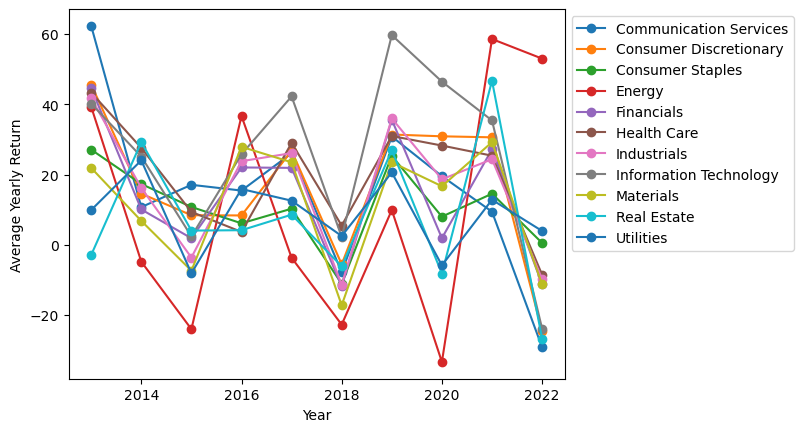

In [20]:
fig, ax = plt.subplots()

for sector in return_df0['Sector'].unique():
    subset = return_df0[return_df0['Sector'] == sector]
    ax.plot(subset['Year'], subset['Yearly Return (%)'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Average Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [101]:
# Calculate the average yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
mean_return_sector = grouped["Weighted Yearly Return"].mean()
return_df = pd.DataFrame(mean_return_sector)
return_df = return_df.reset_index().rename(columns={'index': 'Sector'})
return_df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


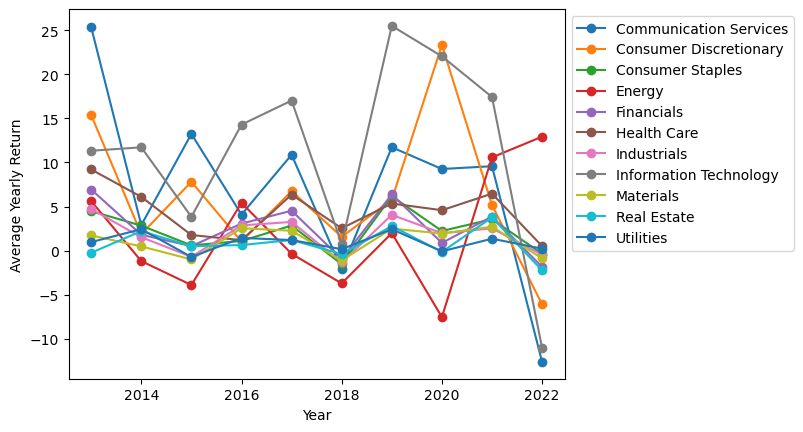

In [80]:
fig, ax = plt.subplots()

for sector in return_df['Sector'].unique():
    subset = return_df[return_df0['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Average Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [81]:
# Calculate the weight yearly return for each sector(weighted algorithm)
grouped = merge_df.groupby(["Sector","Year"])
sector_weight = grouped["Weight"].sum()
weighted_return_sector = (grouped["Weighted Yearly Return"].sum())/sector_weight
return_df1 = pd.DataFrame(weighted_return_sector)
return_df1 = return_df1.rename(columns={0: "Weighted Yearly Return"})
return_df1 = return_df1.reset_index().rename(columns={'index': 'Sector'})
return_df1

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,69.682939
1,Communication Services,2014,7.982869
2,Communication Services,2015,36.418172
3,Communication Services,2016,11.252132
4,Communication Services,2017,29.911997
...,...,...,...
105,Utilities,2018,1.655834
106,Utilities,2019,24.576689
107,Utilities,2020,-0.760719
108,Utilities,2021,13.730587


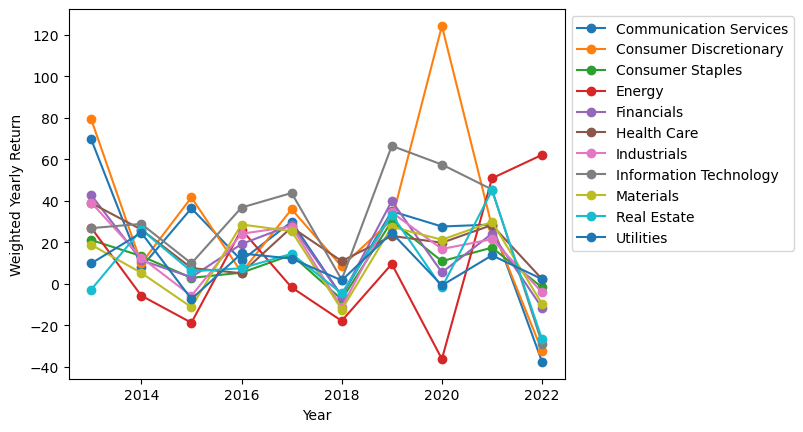

In [82]:
fig, ax = plt.subplots()

for sector in return_df1['Sector'].unique():
    subset = return_df1[return_df1['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [113]:
# Calculate the weight yearly moving for each sector(weighted-mean())
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector=grouped["Weighted Yearly Moving"].mean()
moving_df = pd.DataFrame(weighted_moving_sector)
moving_df = moving_df.reset_index().rename(columns={'index': 'Sector'})
moving_df = moving_df.rename(columns={0: "Weighted Yearly Moving"})
moving_df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


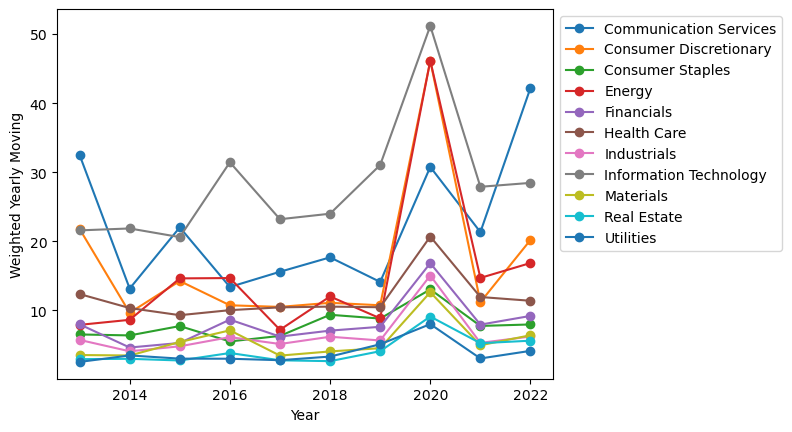

In [114]:
# Plot the moving data
fig, ax = plt.subplots()

for sector in moving_df['Sector'].unique():
    subset = moving_df[moving_df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [111]:
# Calculate the weight yearly moving for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector=(grouped["Weighted Yearly Moving"].sum())/(grouped["Weight"].sum())
moving_df1 = pd.DataFrame(weighted_moving_sector)
moving_df1 = moving_df1.reset_index().rename(columns={'index': 'Sector'})
moving_df1 = moving_df1.rename(columns={0: "Weighted Yearly Moving"})
moving_df1

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,89.411298
1,Communication Services,2014,36.205018
2,Communication Services,2015,60.572937
3,Communication Services,2016,36.839229
4,Communication Services,2017,42.895867
...,...,...,...
105,Utilities,2018,33.660987
106,Utilities,2019,51.677395
107,Utilities,2020,81.201865
108,Utilities,2021,30.871264


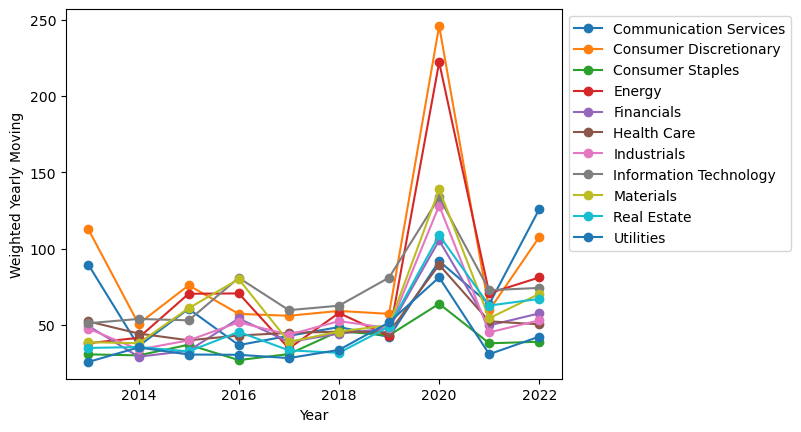

In [112]:
# Plot the moving data
fig, ax = plt.subplots()

for sector in moving_df1['Sector'].unique():
    subset = moving_df1[moving_df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [25]:
## 4. Demonstrate calculating the variance and standard deviation using the different modulesTen year Return Analysis

In [102]:
return_df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


In [87]:
# build a sector list, data store list
sectors = list(return_df["Sector"].unique())
names = []
means = []
stds = []

In [88]:
def sectorSA(name):
    data = return_df.loc[return_df["Sector"]==f"{name}"]
    weighted_yearly_return = data['Weighted Yearly Return']
    mean_numpy = np.mean(weighted_yearly_return)
    var_numpy = np.var(weighted_yearly_return,ddof = 0)
    sd_numpy = np.std(weighted_yearly_return,ddof = 0)
    return (name,mean_numpy,var_numpy,sd_numpy)

In [89]:
for sector in sectors:
    names.append(sectorSA(sector)[0])
    means.append(sectorSA(sector)[1])
    stds.append(sectorSA(sector)[3])

In [103]:
return_sa_df = pd.DataFrame({"Sector":names,
                            "Average Weighted Annual Return(%)":means,
                            "Standard Deviation":stds})

return_sa_df =return_sa_df.sort_values("Average Weighted Annual Return(%)", ascending=False)
return_sa_df = return_sa_df.set_index("Sector")
return_sa_df

,Average Weighted Annual Return(%),Standard Deviation
Sector,,
Information Technology,11.284620,10.305469
Communication Services,7.225362,9.577423
Consumer Discretionary,6.258537,7.743128
Health Care,4.405284,2.661025
Financials,2.516890,2.809189
Consumer Staples,2.192662,2.190075
Energy,1.984219,6.258983
Industrials,1.840828,1.969681
Materials,1.116946,1.506889


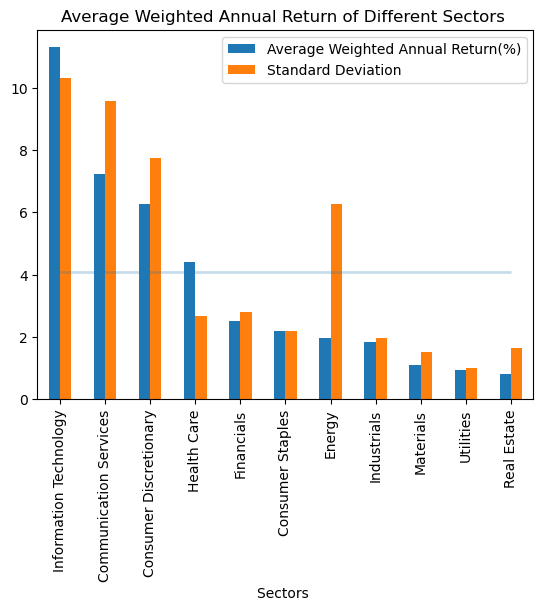

In [136]:
return_sa_df.plot(kind="bar")
plt.hlines(4.1, 0, 10, alpha=0.25,linewidth=2)
plt.title("Average Weighted Annual Return of Different Sectors ")
plt.xlabel("Sectors ")
plt.show()

In [100]:
## anova_exercise

In [115]:
# Extract individual groups
group0 = return_df[return_df["Sector"] == "Communication Services"]["Weighted Yearly Return"]
group1 = return_df[return_df["Sector"] == "Consumer Discretionary"]["Weighted Yearly Return"]
group2 = return_df[return_df["Sector"] == "Consumer Staples"]["Weighted Yearly Return"]
group3 = return_df[return_df["Sector"] == "Energy"]["Weighted Yearly Return"]
group4 = return_df[return_df["Sector"] == "Financials"]["Weighted Yearly Return"]
group5 = return_df[return_df["Sector"] == "Health Care"]["Weighted Yearly Return"]
group6 = return_df[return_df["Sector"] == "Industrials"]["Weighted Yearly Return"]
group7 = return_df[return_df["Sector"] == "Information Technology"]["Weighted Yearly Return"]
group8 = return_df[return_df["Sector"] == "Materials"]["Weighted Yearly Return"]
group9 = return_df[return_df["Sector"] == "Real Estate"]["Weighted Yearly Return"]
group10 = return_df[return_df["Sector"] == "Utilities"]["Weighted Yearly Return"]

In [116]:
stats.f_oneway(group0, group1, group2, group3, group4,group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=3.3239809486729412, pvalue=0.0009308904431263252)

In [117]:
stats.f_oneway(group0, group1, group2)

F_onewayResult(statistic=1.2306639098853447, pvalue=0.3079672553137483)

In [118]:
stats.f_oneway(group8, group9, group10)

F_onewayResult(statistic=0.10647911048733989, pvalue=0.899369436807204)

In [105]:
moving_df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,89.411298
1,Communication Services,2014,36.205018
2,Communication Services,2015,60.572937
3,Communication Services,2016,36.839229
4,Communication Services,2017,42.895867
...,...,...,...
105,Utilities,2018,33.660987
106,Utilities,2019,51.677395
107,Utilities,2020,81.201865
108,Utilities,2021,30.871264


In [119]:
# build a sector list, data store list
sectors = list(return_df["Sector"].unique())
names = []
means = []
stds = []

In [120]:
def sectorSA2(name):
    data = moving_df.loc[return_df["Sector"]==f"{name}"]
    weighted_yearly_moving = data['Weighted Yearly Moving']
    mean_numpy = np.mean(weighted_yearly_moving)
    var_numpy = np.var(weighted_yearly_moving,ddof = 0)
    sd_numpy = np.std(weighted_yearly_moving,ddof = 0)
    return (name,mean_numpy,var_numpy,sd_numpy)

In [121]:
for sector in sectors:
    names.append(sectorSA2(sector)[0])
    means.append(sectorSA2(sector)[1])
    stds.append(sectorSA2(sector)[3])

In [123]:
moving_sa_df = pd.DataFrame({"Sector":names,
                            "Average Annual Moving(%)":means,
                            "Standard Deviation":stds})

moving_sa_df =moving_sa_df.sort_values("Average Annual Moving(%)")
moving_sa_df = moving_sa_df.set_index("Sector")
moving_sa_df

,Average Annual Moving(%),Standard Deviation
Sector,,
Utilities,3.851031,1.558184
Real Estate,4.208079,1.921239
Materials,5.563839,2.639724
Industrials,6.434239,2.944120
Consumer Staples,7.944126,2.047616
Financials,8.149709,3.204384
Health Care,11.756471,3.100334
Energy,15.165836,10.824350
Consumer Discretionary,16.634250,10.631663


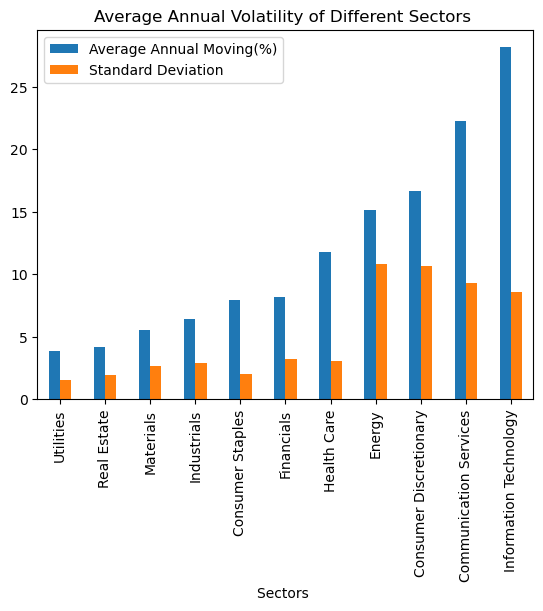

In [137]:
ax = moving_sa_df.plot(kind="bar")
plt.title("Average Annual Volatility of Different Sectors ")
plt.xlabel("Sectors ")
plt.show()

In [125]:
merge_df2 = pd.merge(return_sa_df, moving_sa_df, on="Sector")
merge_df2.head(25)

,Average Weighted Annual Return(%),Standard Deviation_x,Average Annual Moving(%),Standard Deviation_y
Sector,,,,
Information Technology,11.284620,10.305469,28.127868,8.548264
Communication Services,7.225362,9.577423,22.280298,9.322287
Consumer Discretionary,6.258537,7.743128,16.634250,10.631663
Health Care,4.405284,2.661025,11.756471,3.100334
Financials,2.516890,2.809189,8.149709,3.204384
Consumer Staples,2.192662,2.190075,7.944126,2.047616
Energy,1.984219,6.258983,15.165836,10.824350
Industrials,1.840828,1.969681,6.434239,2.944120
Materials,1.116946,1.506889,5.563839,2.639724


In [126]:
del merge_df2["Standard Deviation_x"]
del merge_df2["Standard Deviation_y"]


In [127]:
merge_df2

,Average Weighted Annual Return(%),Average Annual Moving(%)
Sector,,
Information Technology,11.284620,28.127868
Communication Services,7.225362,22.280298
Consumer Discretionary,6.258537,16.634250
Health Care,4.405284,11.756471
Financials,2.516890,8.149709
Consumer Staples,2.192662,7.944126
Energy,1.984219,15.165836
Industrials,1.840828,6.434239
Materials,1.116946,5.563839


In [129]:
x_value=merge_df2["Average Weighted Annual Return(%)"]
y_value=merge_df2["Average Annual Moving(%)"]

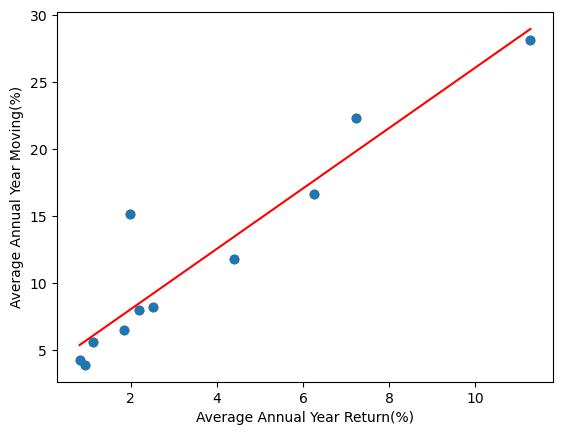

In [130]:
plt.scatter(x_value,y_value, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Average Annual Year Return(%)")
plt.ylabel("Average Annual Year Moving(%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.show()

In [131]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.8889426833518573


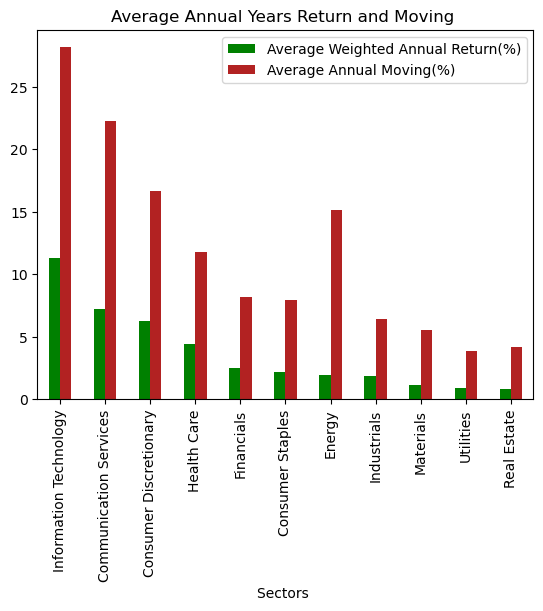

In [132]:

ax = merge_df2.plot(kind="bar",color =["green","firebrick"])
plt.title("Average Annual Years Return and Moving ")
plt.xlabel("Sectors ")
plt.show()

In [116]:
sectors

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [121]:
# Extract individual groups
group0 = moving_df[moving_df["Sector"] == "Communication Services"]["Weighted Yearly Moving"]
group1 = moving_df[moving_df["Sector"] == "Consumer Discretionary"]["Weighted Yearly Moving"]
group2 = moving_df[moving_df["Sector"] == "Consumer Staples"]["Weighted Yearly Moving"]
group3 = moving_df[moving_df["Sector"] == "Energy"]["Weighted Yearly Moving"]
group4 = moving_df[moving_df["Sector"] == "Financials"]["Weighted Yearly Moving"]
group5 = moving_df[moving_df["Sector"] == "Health Care"]["Weighted Yearly Moving"]
group6 = moving_df[moving_df["Sector"] == "Industrials"]["Weighted Yearly Moving"]
group7 = moving_df[moving_df["Sector"] == "Information Technology"]["Weighted Yearly Moving"]
group8 = moving_df[moving_df["Sector"] == "Materials"]["Weighted Yearly Moving"]
group9 = moving_df[moving_df["Sector"] == "Real Estate"]["Weighted Yearly Moving"]
group10 = moving_df[moving_df["Sector"] == "Utilities"]["Weighted Yearly Moving"]

In [122]:
stats.f_oneway(group0, group1, group2, group3, group4,group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=14.255495309943907, pvalue=2.6068363062512066e-15)

In [120]:
chi_square_data = {}

In [112]:
def ReArrange(sector):
    chi_square_data[f"{sector}"] = list(moving_df.loc[return_df["Sector"]==f"{sector}"]["Weighted Yearly Moving"])

In [113]:
for sector in sectors:
    ReArrange(sector)
chi_square_data

{'Communication Services': [32.50876950534834,
  13.163667407183887,
  22.02352142993087,
  13.39425801761165,
  15.596371937509325,
  17.682639637770514,
  14.12543822625161,
  30.768575741571194,
  21.333921496060587,
  42.20582137042742],
 'Consumer Discretionary': [21.79845085314035,
  9.65730559913008,
  14.257429386512214,
  10.74466531484116,
  10.51164022223322,
  11.104903122631942,
  10.74670817715108,
  46.123284948255275,
  11.195507108261952,
  20.202602360684857],
 'Consumer Staples': [6.525204255787787,
  6.384450464211737,
  7.7365931963623975,
  5.51296063062532,
  6.3150889416928075,
  9.370685278884254,
  8.822402975254528,
  13.046272487079383,
  7.757181182039807,
  7.970420447869894],
 'Energy': [7.911659661613416,
  8.640269785656534,
  14.638005160191861,
  14.685479708902577,
  7.195767738337071,
  12.020677049661352,
  8.85485873353008,
  46.14357477838498,
  14.706291645545887,
  16.86177341273105],
 'Financials': [7.992042648713038,
  4.631886297254959,
  5.

In [114]:
chi_square_df =  pd.DataFrame(chi_square_data)
chi_square_df                

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,32.508770,21.798451,6.525204,7.911660,7.992043,12.371208,5.734392,21.584511,3.546696,2.949024,2.548167
1,13.163667,9.657306,6.384450,8.640270,4.631886,10.344644,4.088740,21.864528,3.479634,2.999235,3.485558
2,22.023521,14.257429,7.736593,14.638005,5.291763,9.312222,4.807308,20.612136,5.424016,2.757176,3.025544
3,13.394258,10.744665,5.512961,14.685480,8.668127,10.039838,6.137840,31.439608,7.118814,3.837642,3.009920
4,15.596372,10.511640,6.315089,7.195768,6.212821,10.447625,5.142267,23.200831,3.461035,2.783945,2.796746
5,17.682640,11.104903,9.370685,12.020677,7.078327,10.553717,6.191994,23.999348,4.067097,2.659314,3.324006
6,14.125438,10.746708,8.822403,8.854859,7.630522,10.463363,5.654062,31.048002,4.536504,4.100113,5.103118
7,30.768576,46.123285,13.046272,46.143575,16.839938,20.691434,15.053729,51.176024,12.637162,9.115940,8.018645
8,21.333921,11.195507,7.757181,14.706292,7.946519,11.942471,5.303783,27.894378,4.958089,5.257794,3.048522
9,42.205821,20.202602,7.970420,16.861773,9.205143,11.398193,6.228278,28.459314,6.409339,5.620611,4.150083


In [115]:
stats.chisquare(chi_square_df["Information Technology"],chi_square_df["Utilities"])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
6.303983767205379